# Exploratory Data Analysis

Examining the inventory database structure to identify patterns, data quality issues, and opportunities for vendor performance optimization.

In [1]:
import pandas as pd
import sqlite3
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

## Database Connection

In [2]:
try:
    sys.path.insert(0, str(Path.cwd().parent / 'config'))
    from config_loader import get_config, get_project_root
    config = get_config()
    DB_PATH = get_project_root() / config.database_path
    print('✅ Config loaded')
except ImportError:
    DB_PATH = 'inventory.db'
    print('⚠️ Using default DB path')

conn = sqlite3.connect(str(DB_PATH))

✅ Config loaded


## Schema Overview

In [3]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table'",
    conn
)
print(f"Tables: {len(tables)}\n")
tables

Tables: 7



,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


## Table Exploration

### Beginning Inventory

In [4]:
begin_inventory = pd.read_sql_query("SELECT * FROM begin_inventory LIMIT 5", conn)
print(f"Shape: {begin_inventory.shape}")
begin_inventory

Shape: (5, 9)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


### Ending Inventory

In [5]:
end_inventory = pd.read_sql_query("SELECT * FROM end_inventory LIMIT 5", conn)
print(f"Shape: {end_inventory.shape}")
end_inventory

Shape: (5, 9)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


### Purchases

In [6]:
purchases = pd.read_sql_query("SELECT * FROM purchases LIMIT 5", conn)
total_purchases = pd.read_sql_query('SELECT COUNT(*) as cnt FROM purchases', conn).iloc[0, 0]
print(f"Shape: {purchases.shape}")
print(f"Total records: {total_purchases:,}")
purchases

Shape: (5, 16)
Total records: 2,372,474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


### Purchase Prices

In [7]:
purchase_prices = pd.read_sql_query("SELECT * FROM purchase_prices LIMIT 5", conn)
print(f"Shape: {purchase_prices.shape}")
purchase_prices

Shape: (5, 9)


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


### Sales Transactions

In [8]:
sales = pd.read_sql_query("SELECT * FROM sales LIMIT 5", conn)
total_sales = pd.read_sql_query('SELECT COUNT(*) as cnt FROM sales', conn).iloc[0, 0]
print(f"Shape: {sales.shape}")
print(f"Total records: {total_sales:,}")
sales

Shape: (5, 14)
Total records: 12,825,363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.00,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.00,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.00,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.00,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.00,1,0.79,12546,JIM BEAM BRANDS COMPANY


### Vendor Invoices

In [9]:
vendor_invoice = pd.read_sql_query("SELECT * FROM vendor_invoice LIMIT 5", conn)
print(f"Shape: {vendor_invoice.shape}")
vendor_invoice

Shape: (5, 10)


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,"137,483.78","2,935.20",None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,"15,527.25",429.20,None


### Vendor Sales Summary

In [10]:
vendor_summary = pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5", conn)
total_summary = pd.read_sql_query('SELECT COUNT(*) as cnt FROM vendor_sales_summary', conn).iloc[0, 0]
print(f"Shape: {vendor_summary.shape}")
print(f"Total records: {total_summary:,}")
vendor_summary

Shape: (5, 18)
Total records: 10,692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Sales_To_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,"1,750.00",36.99,145080,"3,811,251.60","142,049.00","5,101,919.51","672,819.31","260,999.20","68,601.68","1,290,667.91",25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,"1,750.00",28.99,164038,"3,804,041.22","160,247.00","4,819,073.49","561,512.37","294,438.66","144,929.24","1,015,032.27",21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,"1,750.00",24.99,187407,"3,418,303.68","187,140.00","4,538,120.60","461,140.15","343,854.07","123,780.22","1,119,816.92",24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,"1,750.00",22.99,201682,"3,261,197.94","200,412.00","4,475,972.88","420,050.01","368,242.80","257,032.07","1,214,774.94",27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,"1,750.00",29.99,138109,"3,023,206.01","135,838.00","4,223,107.62","545,778.28","249,587.83","257,032.07","1,199,901.61",28.41,0.98,1.40


### Data Overview

* `purchases`: Contains purchase date, vendor-brand pairs, quantity, and amount paid.
* `purchase_prices`: Provides actual and purchase prices per brand-vendor pair (unique combination).
* `vendor_invoice`: Aggregates purchases by vendor and PO number, includes freight cost.
* `sales`: Contains sales transactions with quantity sold, selling price, and revenue.

## Data Quality Assessment

In [11]:
quality_checks = {
    'begin_inventory': pd.read_sql_query('SELECT COUNT(*) FROM begin_inventory', conn).iloc[0, 0],
    'end_inventory': pd.read_sql_query('SELECT COUNT(*) FROM end_inventory', conn).iloc[0, 0],
    'purchases': pd.read_sql_query('SELECT COUNT(*) FROM purchases', conn).iloc[0, 0],
    'sales': pd.read_sql_query('SELECT COUNT(*) FROM sales', conn).iloc[0, 0],
    'vendor_invoice': pd.read_sql_query('SELECT COUNT(*) FROM vendor_invoice', conn).iloc[0, 0],
    'vendor_sales_summary': pd.read_sql_query('SELECT COUNT(*) FROM vendor_sales_summary', conn).iloc[0, 0]
}

pd.DataFrame(quality_checks.items(), columns=['Table', 'Record_Count'])

,Table,Record_Count
0,begin_inventory,206529
1,end_inventory,224489
2,purchases,2372474
3,sales,12825363
4,vendor_invoice,5543
5,vendor_sales_summary,10692


## Key Metrics

In [12]:
summary_stats = pd.read_sql_query("""
    SELECT 
        COUNT(DISTINCT VendorNumber) as total_vendors,
        COUNT(DISTINCT Brand) as total_brands,
        SUM(TotalPurchaseQuantity) as total_purchase_qty,
        SUM(TotalSalesQuantity) as total_sales_qty,
        ROUND(SUM(TotalPurchaseDollars), 2) as total_purchase_dollars,
        ROUND(SUM(TotalSalesDollars), 2) as total_sales_dollars,
        ROUND(SUM(GrossProfit), 2) as total_gross_profit,
        ROUND(AVG(ProfitMargin), 2) as avg_profit_margin
    FROM vendor_sales_summary
""", conn)
summary_stats.T

,0
total_vendors,126.00
total_brands,"10,663.00"
total_purchase_qty,"33,582,362.00"
total_sales_qty,"32,904,439.00"
total_purchase_dollars,"321,900,765.53"
total_sales_dollars,"451,620,183.69"
total_gross_profit,"129,719,418.16"
avg_profit_margin,-inf


## Top Performers

In [13]:
top_vendors = pd.read_sql_query("""
    SELECT VendorName,
        ROUND(SUM(TotalSalesDollars), 2) as revenue,
        ROUND(SUM(GrossProfit), 2) as profit,
        ROUND(AVG(ProfitMargin), 2) as avg_margin
    FROM vendor_sales_summary
    GROUP BY VendorName
    ORDER BY revenue DESC
    LIMIT 10
""", conn)
top_vendors

,VendorName,revenue,profit,avg_margin
0,DIAGEO NORTH AMERICA INC,"68,739,834.97","17,780,038.12",-inf
1,MARTIGNETTI COMPANIES,"40,960,117.82","13,098,427.80",-inf
2,PERNOD RICARD USA,"32,279,544.17","8,155,452.61",25.79
3,JIM BEAM BRANDS COMPANY,"31,898,621.16","7,695,470.11",20.01
4,BACARDI USA INC,"25,005,365.79","7,380,987.07",-inf
5,CONSTELLATION BRANDS INC,"24,467,134.23","8,893,216.33",-inf
6,E & J GALLO WINERY,"18,553,774.66","6,264,166.57",-inf
7,BROWN-FORMAN CORP,"18,476,611.60","4,947,178.52",11.58
8,ULTRA BEVERAGE COMPANY LLP,"17,802,646.10","4,592,032.17",-inf
9,M S WALKER INC,"15,436,066.26","4,500,248.96",-inf


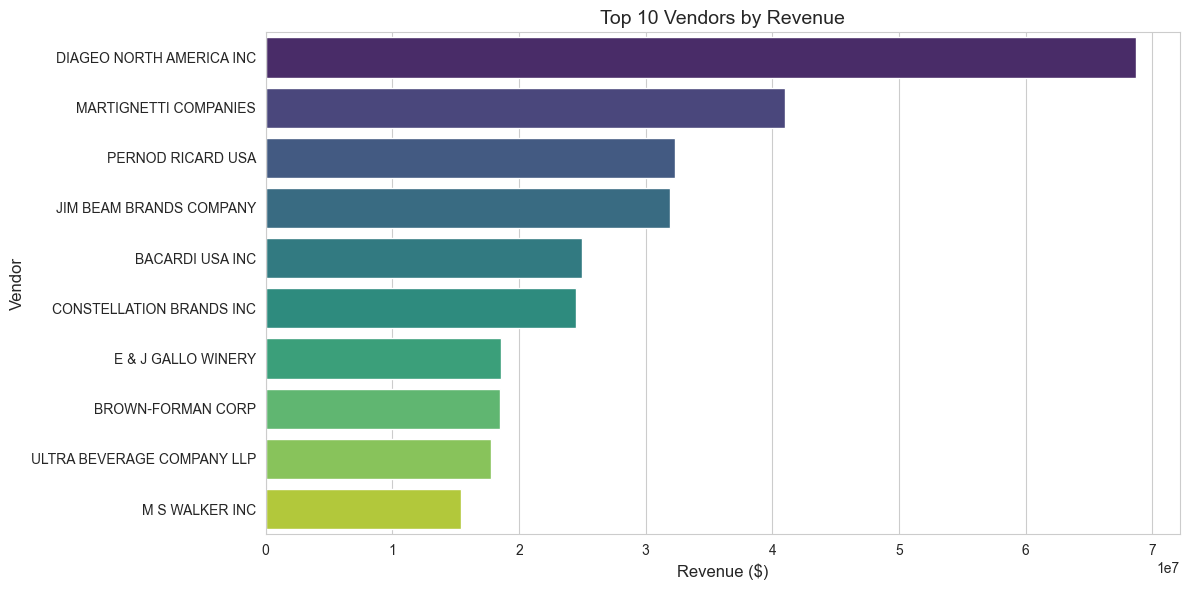

In [14]:
# Visualization: Top 10 Vendors by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vendors, x='revenue', y='VendorName', hue='VendorName', palette='viridis', legend=False)
plt.title('Top 10 Vendors by Revenue', fontsize=14)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Vendor', fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
top_products = pd.read_sql_query("""
    SELECT Description,
        SUM(TotalSalesQuantity) as units_sold,
        ROUND(SUM(TotalSalesDollars), 2) as revenue,
        ROUND(AVG(ProfitMargin), 2) as avg_margin
    FROM vendor_sales_summary
    GROUP BY Description
    ORDER BY units_sold DESC
    LIMIT 10
""", conn)
top_products

,Description,units_sold,revenue,avg_margin
0,Smirnoff 80 Proof,"477,926.00","2,408,193.74",27.79
1,Capt Morgan Spiced Rum,"385,838.00","6,356,320.62",27.26
2,Tito's Handmade Vodka,"358,288.00","7,399,657.58",28.95
3,Absolut 80 Proof,"341,297.00","6,244,752.03",27.05
4,Jack Daniels No 7 Black,"334,824.00","7,964,746.76",26.53
5,Dr McGillicuddy's Mentholmnt,"302,605.00","1,061,780.95",26.56
6,Bacardi Superior Rum,"275,874.00","3,164,376.06",36.22
7,Grey Goose Vodka,"274,794.00","7,209,608.06",25.41
8,Smirnoff Raspberry Vodka,"265,010.00","879,557.40",27.09
9,Jim Beam,"264,054.00","3,387,951.46",37.30


## Key Findings

1. **Data Completeness**: All tables contain structured transactional data
2. **Vendor Performance**: Significant variation in revenue and profit margins
3. **Product Mix**: Top 10 products drive substantial volume

**Next Steps**: Perform detailed vendor performance analysis with statistical testing

In [16]:
conn.close()